In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:\python\\IHMStefanini_industrial_safety_and_health_database.csv')
df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or 3d Party,Critical Risk
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      439 non-null    object
 1   Country                   439 non-null    object
 2   Local                     439 non-null    object
 3   Industry Sector           439 non-null    object
 4   Accident Level            439 non-null    object
 5   Potential Accident Level  439 non-null    object
 6   Gender                    439 non-null    object
 7   Employee or 3d Party      439 non-null    object
 8   Critical Risk             439 non-null    object
dtypes: object(9)
memory usage: 31.0+ KB


In [ ]:
# convert column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      439 non-null    datetime64[ns]
 1   Country                   439 non-null    object        
 2   Local                     439 non-null    object        
 3   Industry Sector           439 non-null    object        
 4   Accident Level            439 non-null    object        
 5   Potential Accident Level  439 non-null    object        
 6   Gender                    439 non-null    object        
 7   Employee or 3d Party      439 non-null    object        
 8   Critical Risk             439 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 31.0+ KB


In [6]:
# create a new column for unique months (YYYY-MM) 2020-10
df['Month'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or 3d Party,Critical Risk,Month
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,2016-01
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,2016-01
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,2016-01
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,2016-01
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,2016-01


In [7]:
# groupd by month
df_months = df.groupby('Month', as_index=False)['Accident Level'].count().rename(columns={'Accident Level': 'Number of Accidents'})
df_months

,Month,Number of Accidents
0,2016-01,12
1,2016-02,43
2,2016-03,34
3,2016-04,29
4,2016-05,26
5,2016-06,33
6,2016-07,19
7,2016-08,21
8,2016-09,24
9,2016-10,21


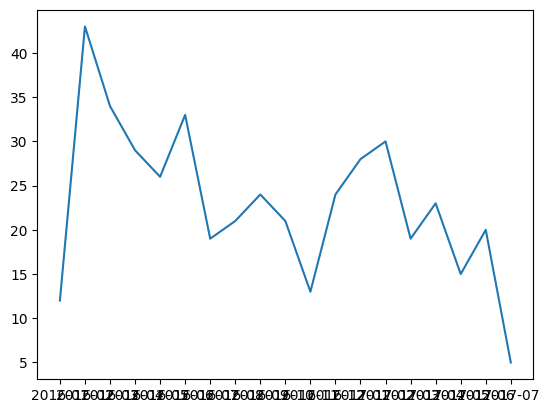

In [8]:

plt.plot(df_months['Month'], df_months['Number of Accidents'])

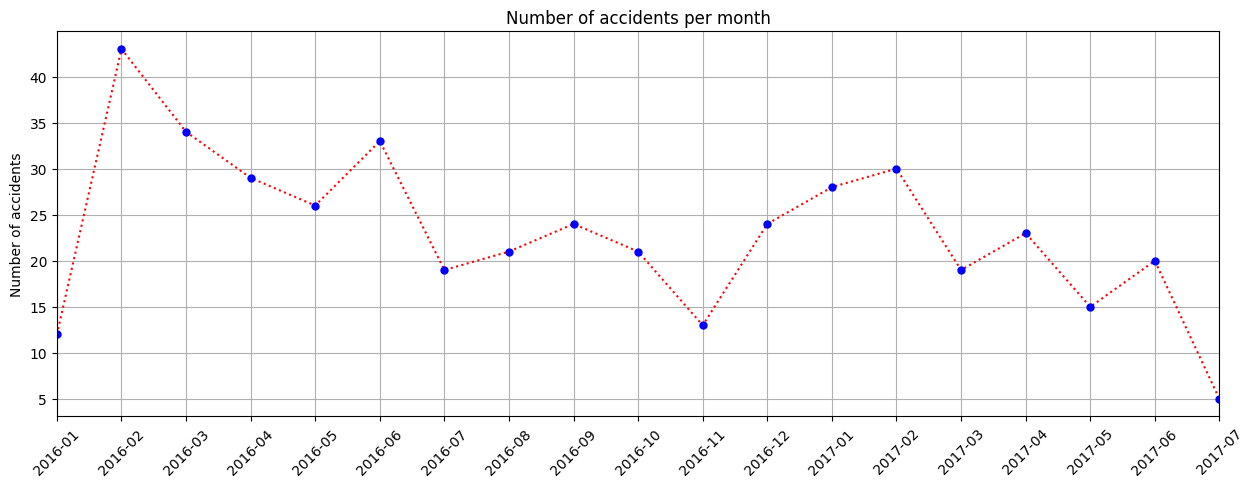

In [9]:
# line plot with adjustments

# specifiy figure size
plt.figure(figsize=(15, 5))

# line plot
plt.plot(df_months['Month'], df_months['Number of Accidents'],
         color='red',
         linestyle='dotted', 
         marker='o',
         markersize=5,
         markerfacecolor='blue',
         markeredgecolor='blue')

# add plot and axes labels
plt.title('Number of accidents per month')
plt.ylabel('Number of accidents')

# X-axis ticks/labels
plt.xticks(ticks=range(len(df_months)), labels=df_months['Month'], rotation=45)

# set X margins to 0 (spacing between X-axis and the first/last datapoint)
plt.margins(x=0)

# # show grid lines
plt.grid()

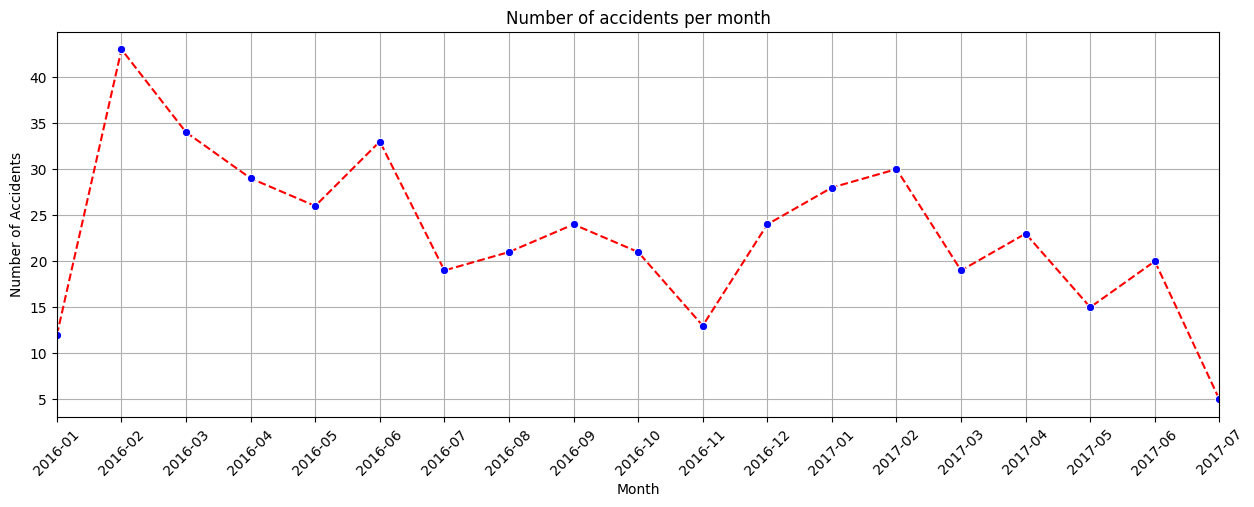

In [11]:
# line plot using sns
plt.figure(figsize=(15, 5))
sns.lineplot(
    data=df_months, 
    x='Month', 
    y='Number of Accidents', 
    marker='o', 
    linestyle='--', 
    color='red', 
    markerfacecolor='blue'
)

# customize plot
plt.title('Number of accidents per month')
plt.xticks(range(len(df_months)), df_months['Month'], rotation=45)
plt.margins(x=0)
plt.grid()

In [12]:
# get accident level counts
df_accident_level = df.groupby('Accident Level')['Accident Level'].count()
df_accident_level

Accident Level
I      328
II      40
III     31
IV      31
V        9
Name: Accident Level, dtype: int64

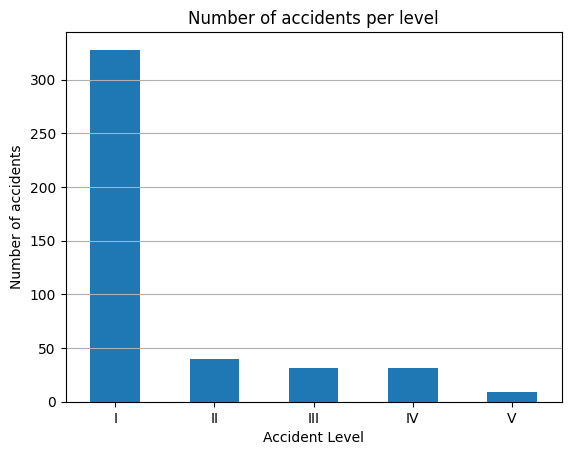

In [13]:
# bar plot

# since the DataFrame only contains one column, we can use the plot method without specifying x and y
df_accident_level.plot(kind='bar', ylabel='Number of accidents', title='Number of accidents per level')

# X-axis ticks/labels
plt.xticks(rotation=0)

# show grid lines
plt.grid(axis='y')

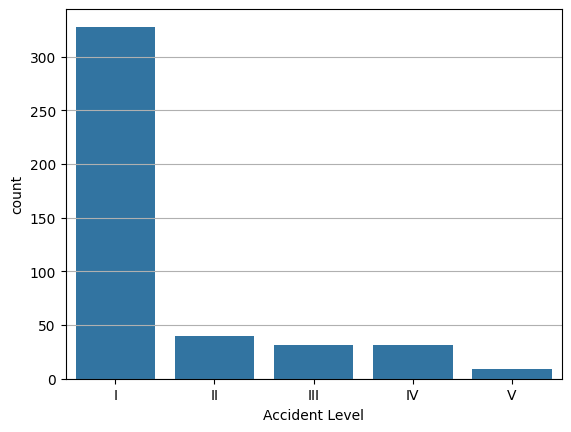

In [14]:
# bar plot with counts of unique values
order_list = ['I', 'II', 'III', 'IV', 'V']
sns.countplot(data=df, x='Accident Level', order=order_list)

# show grid lines
plt.grid(axis='y')

In [15]:
# pie plot
df_industry_sector = df.groupby('Industry Sector')['Industry Sector'].count()
df_industry_sector

Industry Sector
Metals    148
Mining    241
Others     50
Name: Industry Sector, dtype: int64

<Axes: ylabel='Industry Sector'>

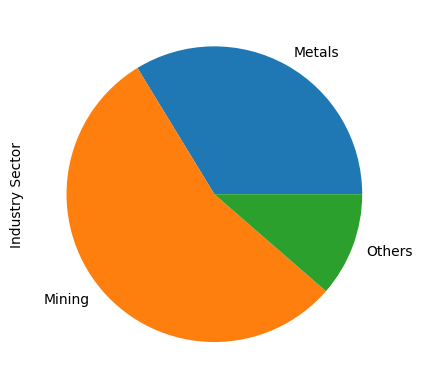

In [16]:
# pie plot
df_industry_sector.plot(kind='pie')

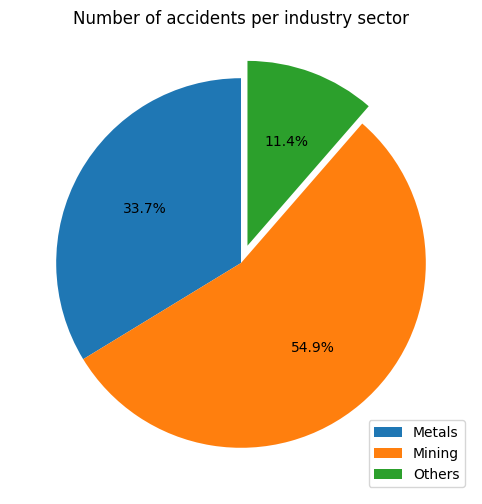

In [17]:
# adjust plot
df_industry_sector.plot(
    kind='pie', 
    figsize=(10, 6), 
    title='Number of accidents per industry sector',
    ylabel='',              # remove Y-axis label
    labels=None,            # disable automatic labels (we will add them in the legend in the next step)
    autopct='%1.1f%%',      # format of the percentage values
    startangle=90,          # start angle of the first pie slice
    explode=[0, 0, 0.1]     # a list of values specifying the fraction of the radius with which to offset each pie slice (here we exploe the "Others" slice)
)

# add legend
plt.legend(labels=df_industry_sector.index, loc='lower right')

In [18]:
# group by month and count the number of accidents
df_country_level = df.groupby(['Country', 'Accident Level'], as_index=False)['Date'].count()
df_country_level

,Country,Accident Level,Date
0,Country_01,I,192
1,Country_01,II,19
2,Country_01,III,21
3,Country_01,IV,23
4,Country_01,V,8
5,Country_02,I,99
6,Country_02,II,19
7,Country_02,III,7
8,Country_02,IV,6
9,Country_02,V,1


In [19]:
# create a pivot table showing the number of accidents by country and by accident level
pivot = pd.crosstab(df['Country'], df['Accident Level'])
pivot

Accident Level,I,II,III,IV,V
Country,,,,,
Country_01,192,19,21,23,8
Country_02,99,19,7,6,1
Country_03,37,2,3,2,0


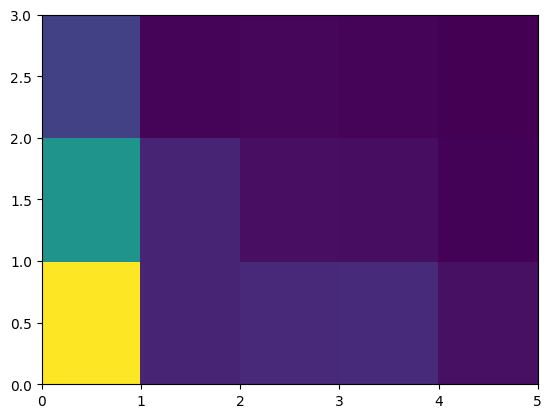

In [20]:
# plot heatmap
plt.pcolor(pivot)

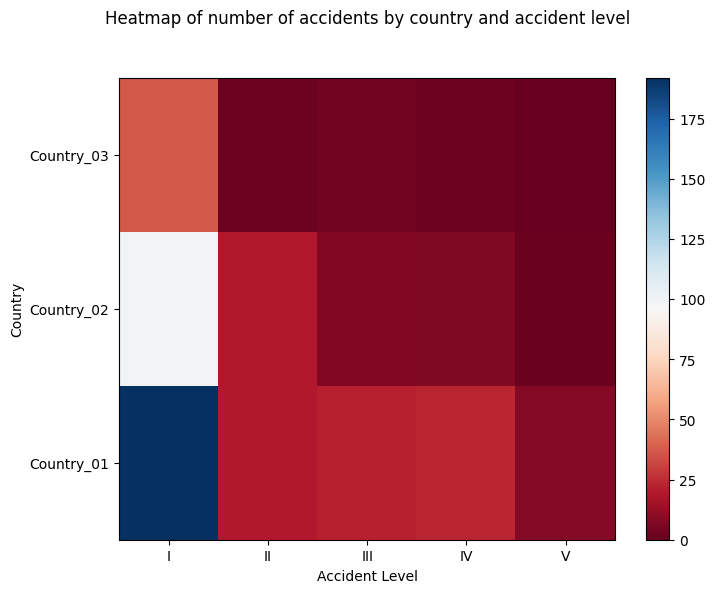

In [21]:
# adjusted heatmap plot

# create a blank figure with a size of 8x6 inches
plt.figure(figsize=(8, 6))

# create heatmap plot
plt.pcolor(pivot, cmap='RdBu')

# add a colorbar
plt.colorbar()

# # add a plot title
plt.title('Heatmap of number of accidents by country and accident level', y=1.1)

# # add Y-axis title
plt.ylabel('Country')

# # updated Y-axis ticks/labels
plt.yticks(ticks=np.arange(len(pivot)) + 0.5, labels=pivot.index)

# # add X-axis title
plt.xlabel('Accident Level')

# # update X-axis ticks/labels
plt.xticks(np.arange(len(pivot.columns)) + 0.5, pivot.columns)

# # show plot (this is only required in Python script files, but it is called by default in Jupyter Notebooks)
plt.show()

Text(0.5, 1.1, 'Heatmap of number of accidents by country and accident level')

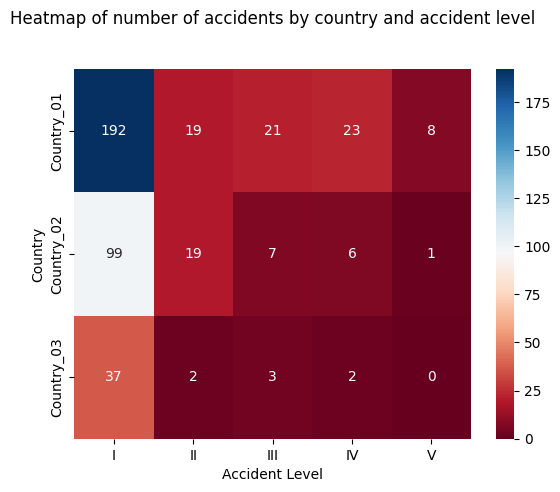

In [22]:
sns.heatmap(pivot, cmap='RdBu', annot=True, fmt='d')
plt.title('Heatmap of number of accidents by country and accident level', y=1.1)

In [23]:
df = pd.read_csv('D:\python\\CO2_Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size [L],Cylinders,Transmission,Fuel Type,Fuel Consumption City [L/100 km],Fuel Consumption Hwy [L/100 km],Fuel Consumption Comb [L/100 km],Fuel Consumption Comb [mpg],CO2 Emissions [g/km]
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size [L]                   7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City [L/100 km]  7385 non-null   float64
 8   Fuel Consumption Hwy [L/100 km]   7385 non-null   float64
 9   Fuel Consumption Comb [L/100 km]  7385 non-null   float64
 10  Fuel Consumption Comb [mpg]       7385 non-null   int64  
 11  CO2 Emissions [g/km]              7385 non-null   int64  
dtypes: flo

<Axes: ylabel='Frequency'>

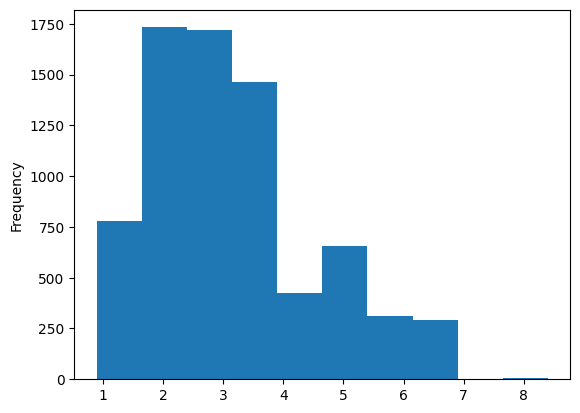

In [25]:
# histogram
df['Engine Size [L]'].plot(kind='hist')

In [26]:
# use numpy to get the histogram data
freq, bin_edges = np.histogram(df['Engine Size [L]'], 10)
print(freq)
print(bin_edges)

[ 777 1733 1719 1463  427  655  312  291    0    8]
[0.9  1.65 2.4  3.15 3.9  4.65 5.4  6.15 6.9  7.65 8.4 ]


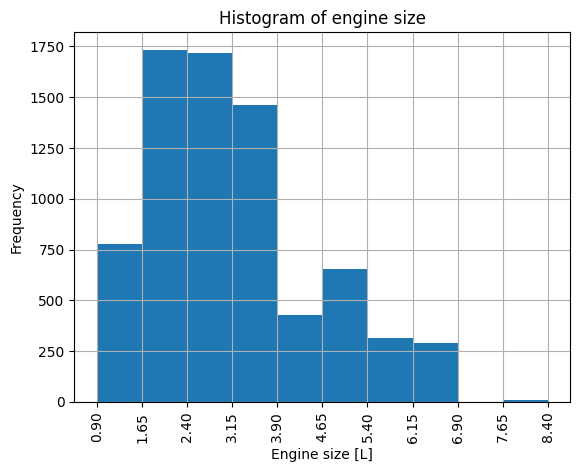

In [27]:
# plot histogram
df['Engine Size [L]'].plot(kind='hist', bins=10, title='Histogram of engine size', xlabel='Engine size [L]')

# X-axis ticks/labels
plt.xticks(bin_edges, rotation=90)

# show grid lines
plt.grid()

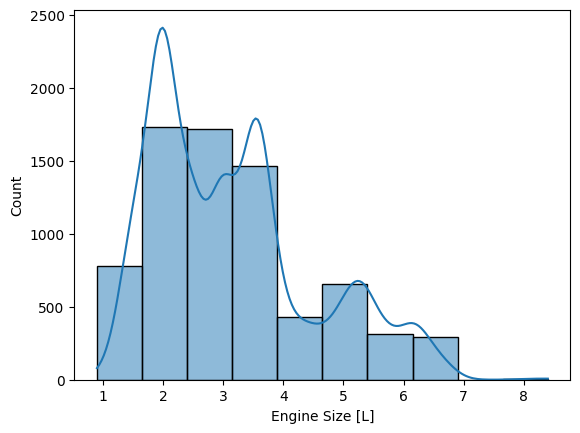

In [28]:
# creating a histogram using sns
sns.histplot(df['Engine Size [L]'], bins=10, kde=True)

# X-axis ticks/labels
# plt.xticks(bin_edges, rotation=90)

plt.show()

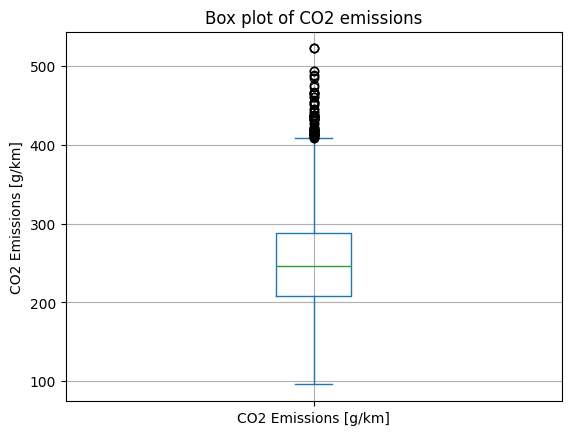

In [29]:
# box plot
df['CO2 Emissions [g/km]'].plot(kind='box', title='Box plot of CO2 emissions', ylabel='CO2 Emissions [g/km]')

# show grid lines
plt.grid()

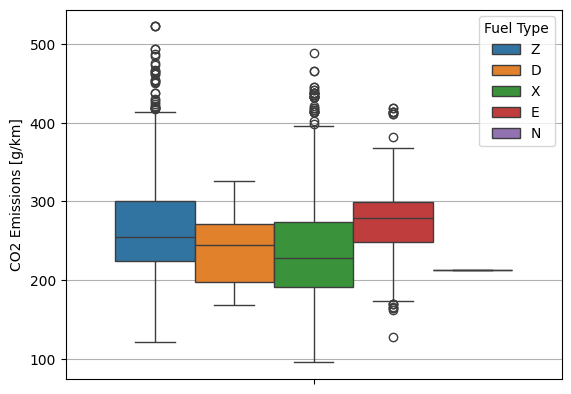

In [30]:
# box plot
sns.boxplot(y=df['CO2 Emissions [g/km]'], hue=df['Fuel Type'])

# show grid lines
plt.grid(axis='y')

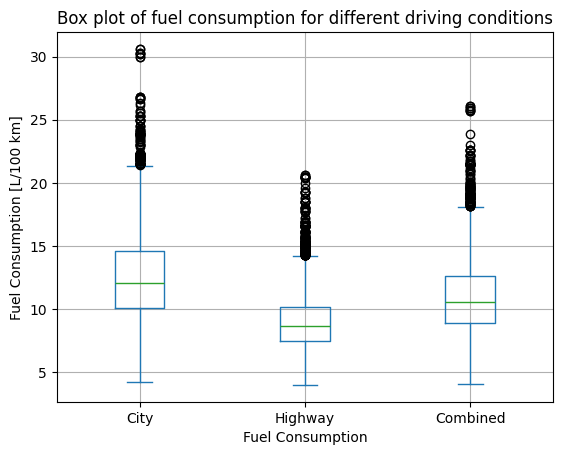

In [31]:
# multiple box plots
df[['Fuel Consumption City [L/100 km]', 'Fuel Consumption Hwy [L/100 km]', 'Fuel Consumption Comb [L/100 km]']].plot(
    kind='box',
    title='Box plot of fuel consumption for different driving conditions',
    ylabel='Fuel Consumption [L/100 km]',
    xlabel='Fuel Consumption'
)

# X-axis ticks/labels
plt.xticks(ticks=[1, 2, 3], labels=['City', 'Highway', 'Combined'])

# show grid lines
plt.grid()

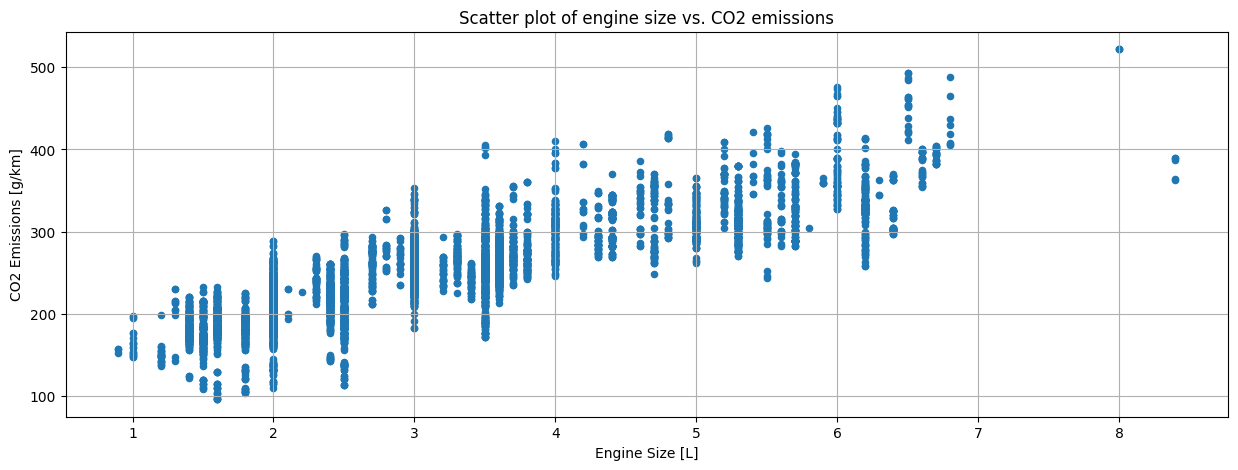

In [32]:
# scatter plot
df.plot(kind='scatter', x='Engine Size [L]', y='CO2 Emissions [g/km]', title='Scatter plot of engine size vs. CO2 emissions', figsize=(15, 5))

# show grid lines
plt.grid()

In [34]:
# trend line
fit = np.polyfit(df['Engine Size [L]'], df['CO2 Emissions [g/km]'], 1)
fit

array([ 36.77731519, 134.36589272])

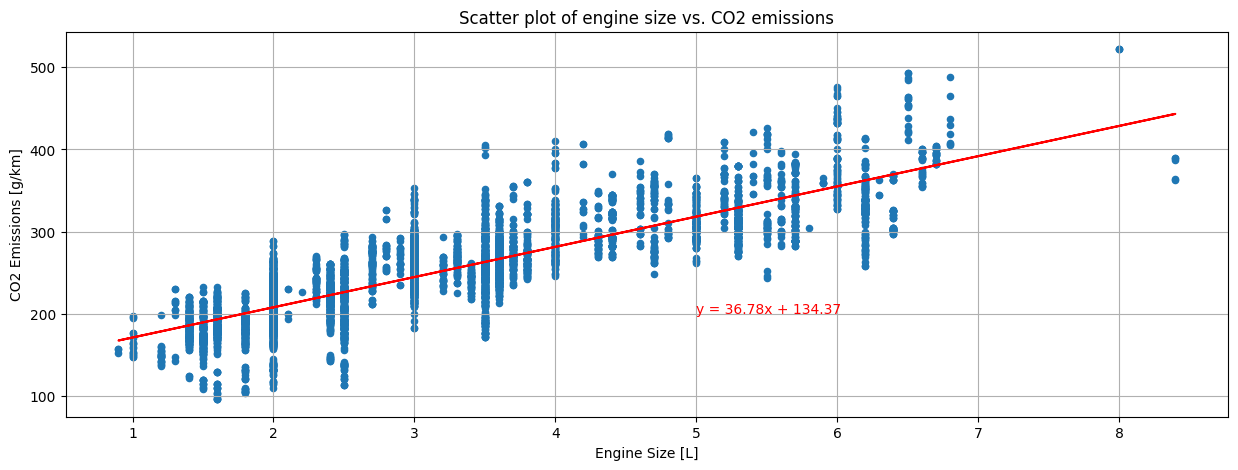

In [35]:
# scatter plot
df.plot(kind='scatter', x='Engine Size [L]', y='CO2 Emissions [g/km]', title='Scatter plot of engine size vs. CO2 emissions', figsize=(15, 5))

# plot trend line
y = fit[0] * df['Engine Size [L]'] + fit[1]
plt.plot(df['Engine Size [L]'], y, color='red')

# anotate trend line equation
plt.annotate('y = {0:.2f}x + {1:.2f}'.format(fit[0], fit[1]), xy=(5, 200), color='red')

# show grid lines
plt.grid()

Text(0.5, 1.0, 'Scatter plot of engine size vs. CO2 emissions')

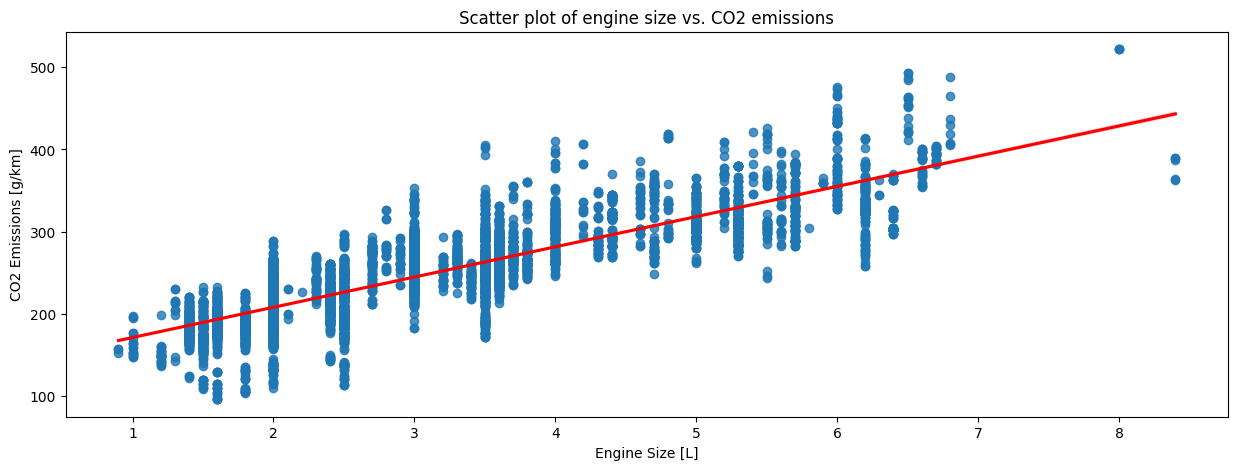

In [36]:
plt.figure(figsize=(15, 5))
sns.regplot(x='Engine Size [L]', y='CO2 Emissions [g/km]', data=df, line_kws={'color': 'red'})
plt.title('Scatter plot of engine size vs. CO2 emissions')

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Variables')

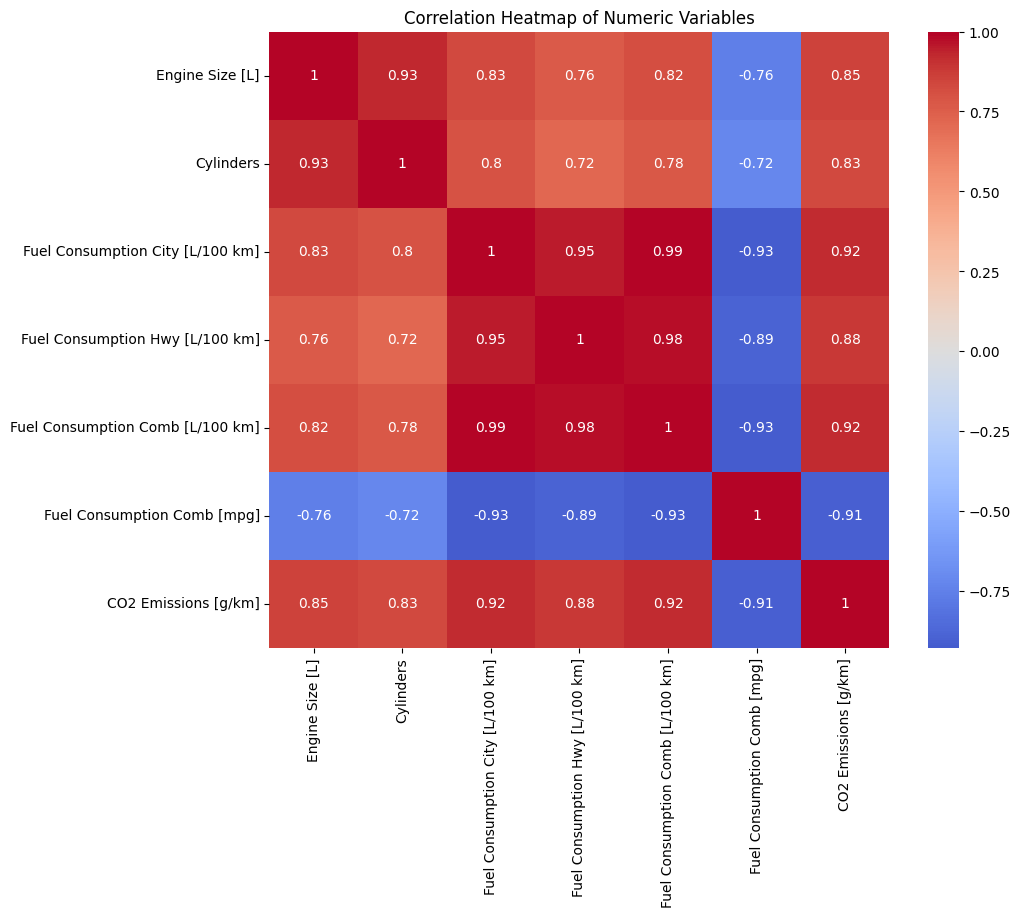

In [39]:
# select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# create correlation matrix
corr_matrix = df[numeric_cols].corr()

# create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# set title
plt.title('Correlation Heatmap of Numeric Variables')

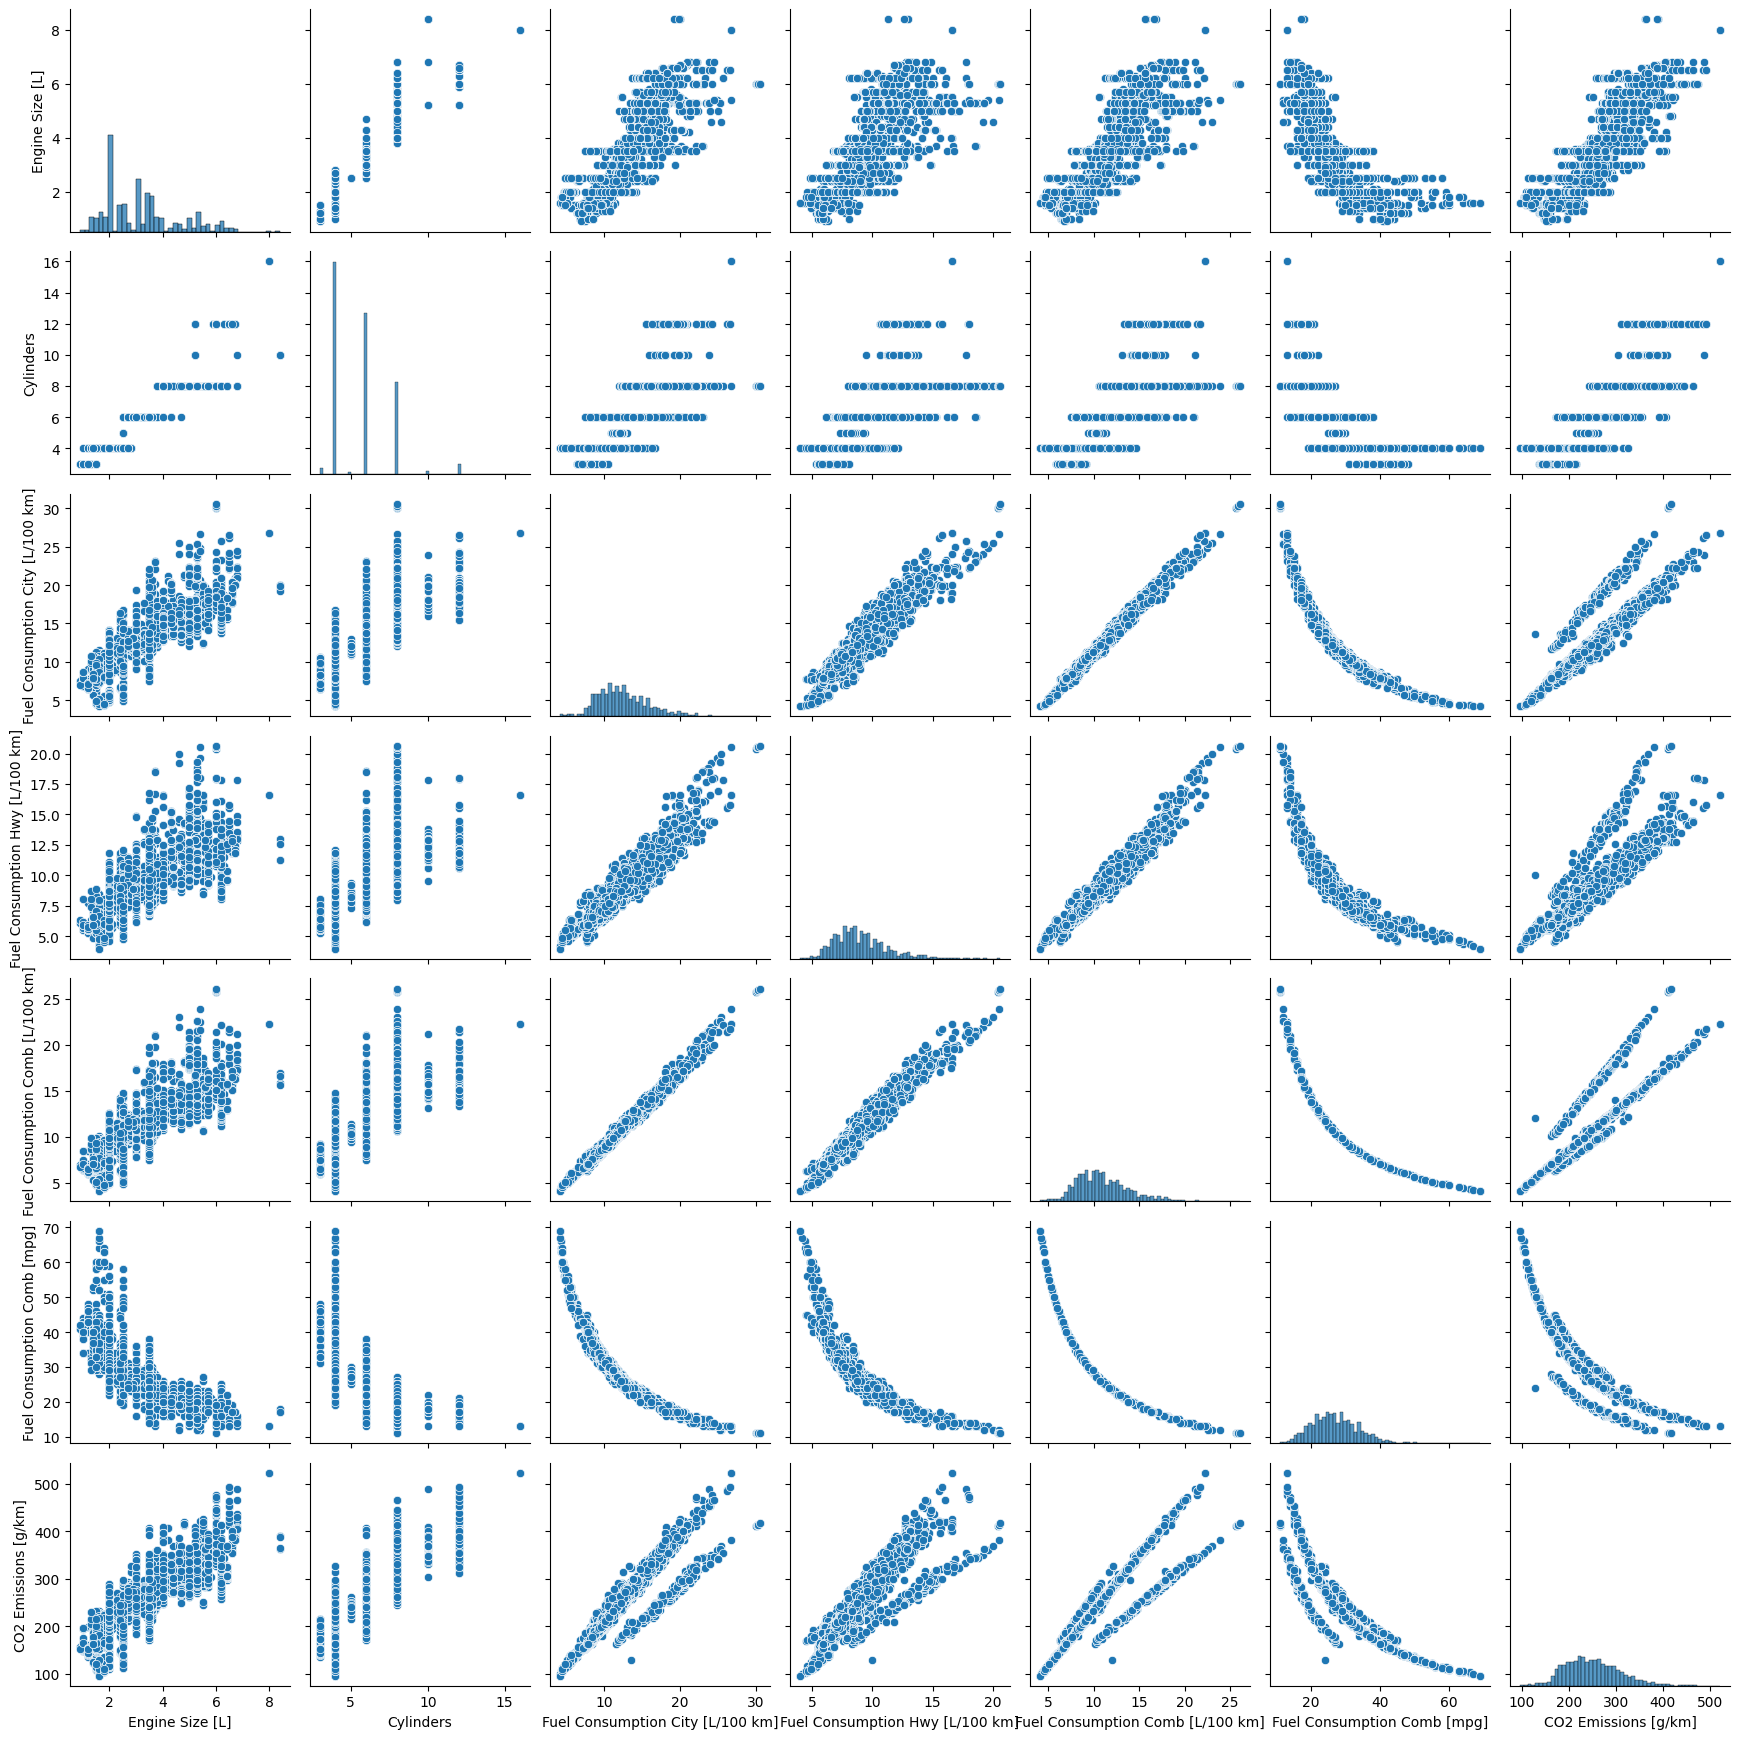

In [40]:
# create pair plot for numeric variables
sns.pairplot(df[numeric_cols])
plt.tight_layout()